In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
# Loading the training and testing file
file=r'/Users/subhadeep/Downloads/carvan_train.csv'
file1=r'/Users/subhadeep/Downloads/carvan_test.csv'
bd_train=pd.read_csv(file)
bd_test=pd.read_csv(file1)

In [3]:
bd_train.shape

(5822, 86)

In [4]:
bd_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [5]:
bd_test.shape

(4000, 85)

In [7]:
# dropping the target variable 'v86'
bd_train_new=bd_train.drop(['V86'],axis=1)
bd_test_new=bd_test

In [8]:
# there are no missing value in the data
bd_train.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
      ..
V57    0
V58    0
V59    0
V60    0
V61    0
V62    0
V63    0
V64    0
V65    0
V66    0
V67    0
V68    0
V69    0
V70    0
V71    0
V72    0
V73    0
V74    0
V75    0
V76    0
V77    0
V78    0
V79    0
V80    0
V81    0
V82    0
V83    0
V84    0
V85    0
V86    0
Length: 86, dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

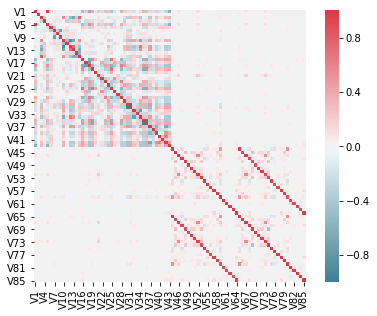

In [12]:
## set the width and height of the plot
# subplot will decide the height and width of the plot
f, ax = plt.subplots(figsize=(7,5))

# generating correlation matrix
corr=bd_train_new.corr()

## mask will crate individual blocks in correlation matrix, np.zeroes will create square blocks in whole paine
##cmap. diverse_palette will set the colours
## plot using seaborn libraray
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
           square= True,ax=ax)

In [13]:
from sklearn.ensemble import (RandomForestClassifier)

In [17]:
x_new=bd_train_new
y_new=bd_train['V86']

In [18]:
# making a baseline random forest for feature importance
clf_rf_new = RandomForestClassifier(n_estimators=100,max_features=30,n_jobs=-1)

In [20]:
clf_rf_new.fit(x_new,y_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
# feature importance
# From the below table we can see that  V59 is the most important variable followed by V1 and V47
feature_imp = pd.Series(clf_rf_new.feature_importances_,index=x_new.columns).sort_values(ascending=False)
feature_imp

V59    0.054253
V1     0.041970
V47    0.036915
V68    0.034902
V44    0.028729
V43    0.025973
V24    0.021621
V65    0.020854
V17    0.020677
V5     0.020617
V22    0.020240
V18    0.019727
V9     0.019513
V7     0.018771
V16    0.018427
V80    0.018298
V28    0.018058
V38    0.017966
V15    0.017957
V23    0.017639
V14    0.017359
V8     0.017065
V30    0.015916
V27    0.015682
V31    0.015358
V26    0.015048
V39    0.014988
V40    0.014920
V76    0.014711
V10    0.014386
         ...   
V21    0.007124
V85    0.006593
V2     0.006576
V75    0.006521
V62    0.005891
V41    0.005873
V57    0.004781
V51    0.003401
V63    0.003246
V58    0.002801
V52    0.002586
V79    0.002394
V45    0.002386
V78    0.002282
V84    0.001901
V73    0.001816
V66    0.001416
V72    0.001413
V48    0.001364
V69    0.000887
V60    0.000387
V81    0.000377
V67    0.000363
V46    0.000243
V56    0.000222
V77    0.000103
V53    0.000049
V74    0.000021
V50    0.000000
V71    0.000000
Length: 85, dtype: float

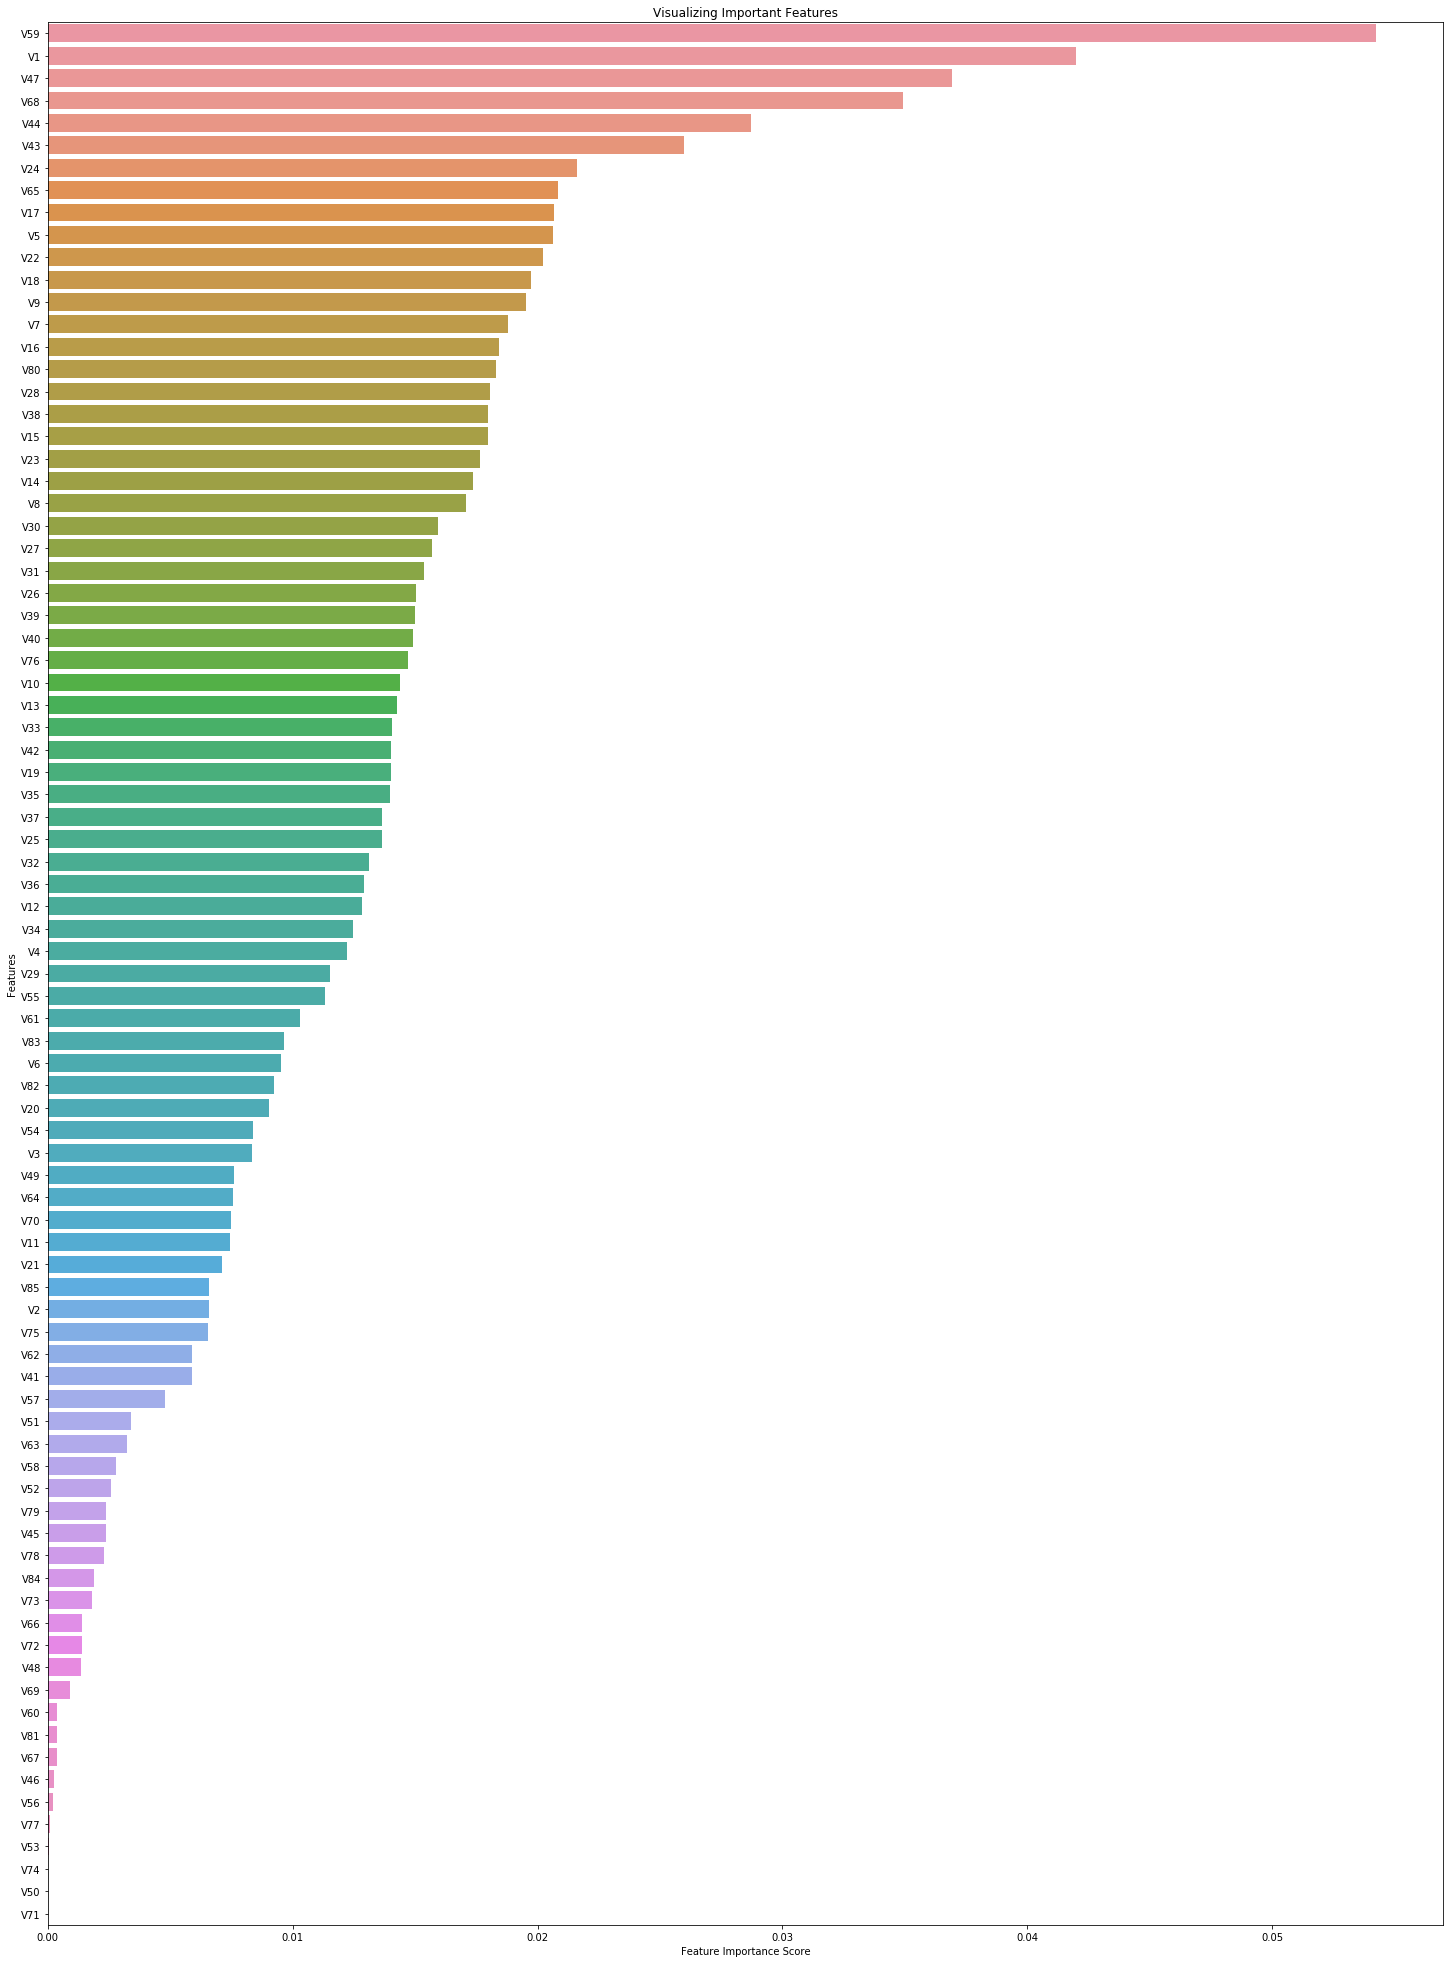

In [22]:
%matplotlib inline
# Creating a bar plot
f, ax = plt.subplots(figsize=(25,35))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

# We can see from the below mentioned feature imporatnce plot that variables like V74,V71,V50 are not contributing at all 
# in the model. We can remove some varibles based of imporatnce in the model selection.

In [23]:
print (bd_train_new.shape)
print (bd_test_new.shape)

(5822, 85)
(4000, 85)


In [24]:
X=bd_train_new.copy()
Y=bd_test_new.copy()

In [25]:
X=scale(X)
Y=scale(Y)

In [26]:
# based on feature imporatnce plot we can see that we can drop some variables . We are now doing PCA analysis to 
# deduction some variables.
pca=PCA(n_components=85)

In [27]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_

array([[ 1.80430665e-01, -2.98433538e-03, -1.25278190e-01, ...,
        -1.65002437e-02, -1.11724932e-02, -2.87530113e-02],
       [ 1.87238195e-01, -1.24586257e-03,  2.76070362e-01, ...,
        -6.04239902e-03,  2.02252352e-03,  6.69882370e-03],
       [ 1.77441536e-02, -1.83656502e-02, -1.00056165e-01, ...,
        -2.39268819e-02,  1.10417206e-02,  1.96422971e-02],
       ...,
       [-7.05821832e-01,  5.67313620e-03, -7.04876887e-03, ...,
        -1.42920134e-04,  8.33860732e-04, -6.50877874e-03],
       [ 8.64483646e-04, -4.33717132e-05, -3.02409613e-03, ...,
         1.51872393e-03,  1.76796309e-03, -4.64431941e-03],
       [-7.07338003e-04,  2.81232607e-04, -1.55615873e-04, ...,
        -1.47748913e-04, -5.84731161e-04, -4.97807168e-04]])

In [29]:
pca.components_.shape

(85, 85)

In [30]:
var=pca.explained_variance_ratio_
print(var)

[1.10015197e-01 5.77862769e-02 4.69297821e-02 3.97624995e-02
 3.57216512e-02 3.22593786e-02 2.68351188e-02 2.63583368e-02
 2.57500289e-02 2.48098677e-02 2.36700104e-02 2.35377298e-02
 2.29595202e-02 2.25117460e-02 2.17534018e-02 2.14457086e-02
 2.09039158e-02 2.05059943e-02 2.04106260e-02 1.99851001e-02
 1.91765809e-02 1.87678268e-02 1.80869995e-02 1.67451598e-02
 1.61992886e-02 1.59646131e-02 1.50704677e-02 1.45480118e-02
 1.42124588e-02 1.38822265e-02 1.33994247e-02 1.24942247e-02
 1.15773495e-02 1.09549984e-02 1.03440198e-02 1.03186520e-02
 9.62969186e-03 9.50930103e-03 8.96643453e-03 8.72970014e-03
 8.21577308e-03 7.83596637e-03 7.27100694e-03 7.02674200e-03
 6.56288366e-03 5.51364787e-03 5.39148375e-03 4.55103482e-03
 3.95510706e-03 3.77442684e-03 2.24347086e-03 2.03930233e-03
 1.79363233e-03 1.74792160e-03 1.64528649e-03 1.52170425e-03
 1.36363163e-03 1.35410897e-03 1.21182393e-03 1.13373817e-03
 1.08038873e-03 1.02521659e-03 9.98793138e-04 9.36257708e-04
 7.88553603e-04 7.500798

In [31]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var1)

[ 11.    16.78  21.47  25.45  29.02  32.25  34.93  37.57  40.15  42.63
  45.    47.35  49.65  51.9   54.08  56.22  58.31  60.36  62.4   64.4
  66.32  68.2   70.01  71.68  73.3   74.9   76.41  77.86  79.28  80.67
  82.01  83.26  84.42  85.52  86.55  87.58  88.54  89.49  90.39  91.26
  92.08  92.86  93.59  94.29  94.95  95.5   96.04  96.5   96.9   97.28
  97.5   97.7   97.88  98.05  98.21  98.36  98.5   98.64  98.76  98.87
  98.98  99.08  99.18  99.27  99.35  99.43  99.5   99.56  99.61  99.65
  99.69  99.73  99.77  99.81  99.84  99.87  99.9   99.92  99.94  99.96
  99.98  99.99 100.   100.   100.  ]


In [32]:
pca=PCA(n_components=62)

In [33]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=62, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
var2=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print(var2)

[11.   16.78 21.47 25.45 29.02 32.25 34.93 37.57 40.15 42.63 45.   47.35
 49.65 51.9  54.08 56.22 58.31 60.36 62.4  64.4  66.32 68.2  70.01 71.68
 73.3  74.9  76.41 77.86 79.28 80.67 82.01 83.26 84.42 85.52 86.55 87.58
 88.54 89.49 90.39 91.26 92.08 92.86 93.59 94.29 94.95 95.5  96.04 96.5
 96.9  97.28 97.5  97.7  97.88 98.05 98.21 98.36 98.5  98.64 98.76 98.87
 98.98 99.08]


In [35]:
pca.components_.shape

(62, 85)

In [36]:
# We have dropped variable from 85 to 62 as we have taken cut off as 99%. so these 62 variables are able to tell 99%
# of the total variance of the model
X1=pd.DataFrame(pca.transform(X))
Y1=pd.DataFrame(pca.transform(Y))

In [37]:
X1.shape

(5822, 62)

In [38]:
Y1.shape

(4000, 62)

In [39]:
from sklearn.model_selection import KFold,train_test_split

In [40]:
y=bd_train['V86']

In [42]:
y.value_counts()

0    5474
1     348
Name: V86, dtype: int64

In [43]:
# splitting the dataset into 80:20 . Training set consist of 80% of the data. Also take straified sampling as 5% of the
# target carible is 1 and the rest is 0
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=2,stratify=y)

In [44]:
print (x_train.shape,y_train.shape)
print (x_test.shape,y_test.shape)

(4657, 62) (4657,)
(1165, 62) (1165,)


In [45]:
y_train.value_counts()

0    4379
1     278
Name: V86, dtype: int64

In [46]:
y_test.value_counts()

0    1095
1      70
Name: V86, dtype: int64

In [47]:
x_train.index

Int64Index([5631, 2062, 1719, 1390, 1213, 3482, 5393, 3604, 1193, 4587,
            ...
             575, 3112,  100,  681, 1874,  530, 2133, 2519, 3466, 2635],
           dtype='int64', length=4657)

In [48]:
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [49]:
x_train.index

RangeIndex(start=0, stop=4657, step=1)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression(class_weight='balanced')

In [52]:
lr.fit(x_train,y_train)

/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
predicted_lr=lr.predict(x_test)

In [54]:
from sklearn.metrics import roc_auc_score

In [55]:
roc_auc_score(y_test,predicted_lr)

0.6701239399869536

In [56]:
from sklearn.metrics import fbeta_score

In [57]:
f_score=fbeta_score(y_test,predicted_lr,average='weighted',beta=0.5)

In [58]:
f_score

0.8487891001746449

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
con_mat=confusion_matrix(y_test,predicted_lr)

In [61]:
con_mat

array([[748, 347],
       [ 24,  46]])

In [62]:
from sklearn.metrics import classification_report

In [63]:
class_report=classification_report(y_test,predicted_lr)

In [64]:
print (class_report)

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      1095
           1       0.12      0.66      0.20        70

    accuracy                           0.68      1165
   macro avg       0.54      0.67      0.50      1165
weighted avg       0.92      0.68      0.77      1165



In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier,ExtraTreesClassifier)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV

In [76]:
clf_rf = RandomForestClassifier(verbose=1,n_jobs=-1)

In [77]:
# parameter tuning for random forest with Randomizedsearchcv. we have made 20X10 best possible combination
param_dist = {"n_estimators":[10,100,300,500],
              "max_depth": [3,5,10,20, None],
              "max_features": [5,10,20,40],
              "min_samples_split": [2,5,10],
              "min_samples_leaf": [1,5,10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

n_iter_search = 20

In [79]:
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist,
                                   n_iter=n_iter_search,scoring='roc_auc',cv=10,n_jobs=-1)
random_search.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.4s finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=-1,

In [82]:
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.best_estimator_)

0.748604570249813
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 40, 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=40, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)


In [83]:
clf_rf1=RandomForestClassifier(n_estimators=300,min_samples_leaf=10,min_samples_split=5,max_features=40,max_depth=10,
                              criterion='entropy',class_weight="balanced")

In [85]:
clf_rf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='entropy', max_depth=10, max_features=40,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [86]:
predicted_clf_rf1=clf_rf1.predict(x_test)

In [87]:
roc_auc_score(predicted_clf_rf1,y_test)

0.5666690626797011

In [89]:
f_score_rf=fbeta_score(y_test,predicted_clf_rf1,average='weighted',beta=0.5)
print(f_score_rf)

0.9022886703608969


In [90]:
# parameter tuning for gradient boosting classifier
gbm_params={'n_estimators':[50,100,200,500],
           'learning_rate':[0.01,0.05,0.1,0.4],
           'max_depth':[1,2,3,4,5],
           'subsample':[0.5,0.8,1],
           'max_features':[5,10,15,20,30]}

In [91]:
gbm=GradientBoostingClassifier()

In [92]:
random_search = RandomizedSearchCV(gbm, param_distributions=gbm_params,
                                   n_iter=20,scoring='roc_auc',cv=10,n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [93]:
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.best_estimator_)

0.749361553370401
{'subsample': 0.5, 'n_estimators': 200, 'max_features': 5, 'max_depth': 2, 'learning_rate': 0.05}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [94]:
gbm1=GradientBoostingClassifier(n_estimators=200,max_features=5,subsample=0.5,max_depth=2,learning_rate=0.05)

In [95]:
gbm1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [96]:
predict_gbm1=gbm1.predict(x_test)

In [97]:
roc_auc_score(y_test,predict_gbm1)

0.49817351598173515

In [98]:
f_score_gbm1=fbeta_score(y_test,predict_gbm1,average='weighted',beta=0.5)
print(f_score_gbm1)

0.8934015960370538


In [99]:
xgb=XGBClassifier()

In [100]:
# parameter tuning set for param_dist
param_dist1 = {"learning_rate":[0.05,0.1,0.2], 
               "n_estimators":[100,150,250],
               "max_depth": [3,4,5],
               "subsample":[0.8,1,0.5],
               "colsample_bytree":[0.6,0.7,0.8]
              }
n_iter_search=20

In [101]:
# hyperparameter tuning for xgbooost 
random_search1 = RandomizedSearchCV(xgb, param_distributions=param_dist1,
                                   n_iter=n_iter_search,scoring='roc_auc',cv=10)
random_search1.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
         

In [102]:
print(random_search1.best_score_)
print(random_search1.best_params_)
print(random_search1.best_estimator_)

0.7562312849698579
{'subsample': 0.5, 'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)


In [103]:
xgb1=XGBClassifier(n_estimators=250,max_depth=3,subsample=0.5,learning_rate=0.05,colsample_bytree=0.6,
                  scale_pos_weight=0.95)

In [104]:
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.95, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [106]:
predict_xgb1=xgb1.predict(x_test)

In [107]:
roc_auc_score(y_test,predict_xgb1)

0.4986301369863014

In [108]:
f_score_xgb1=fbeta_score(y_test,predict_xgb1,average='weighted',beta=0.5)
print(f_score_xgb1)

0.8935976546181618


In [109]:
clf_knn=KNeighborsClassifier()

In [110]:
knn_param = {
    "n_neighbors": [i for i in range(1,30,5)],
    "weights": ["uniform", "distance"]
    }

In [111]:
random_search = RandomizedSearchCV(clf_knn, param_distributions=knn_param,
                                   n_iter=10,scoring='roc_auc',cv=10,n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 6, 11, 16, 21, 26],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [113]:
print(random_search.best_score_)
print(random_search.best_params_)
print(random_search.best_estimator_)

0.6717667294817762
{'weights': 'uniform', 'n_neighbors': 26}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')


In [114]:
knn1=KNeighborsClassifier(n_neighbors=26,weights='uniform')

In [115]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

In [116]:
predict_knn1=knn1.predict(x_test)

In [117]:
roc_auc_score(y_test,predict_knn1)

0.5

In [118]:
f_score_knn1=fbeta_score(y_test,predict_knn1,average='weighted',beta=0.5)
print(f_score_knn1)

0.8941841951204961


/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
from vecstack import stacking

/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [120]:
# making a 1st level model for stacking with3 different baseline models which are tuned ( hyperparameter)
models = [lr,clf_rf1,xgb1,gbm1,knn1]

In [122]:
# creating a training and testing dataset for stacking
s_train, s_test = stacking(models,x_train,y_train,x_test,regression=False,mode='oof_pred_bag',needs_proba=False,
         save_dir=None,metric=roc_auc_score,n_folds=5,stratified=True,random_state=2,verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [roc_auc_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LogisticRegression]
    fold  0:  [0.64037019]


/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.70364481]
    fold  2:  [0.67131442]


/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.69815276]
    fold  4:  [0.69454545]
    ----
    MEAN:     [0.68160553] + [0.02338052]
    FULL:     [0.68141440]

model  1:     [RandomForestClassifier]


/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.54594749]
    fold  1:  [0.54500978]
    fold  2:  [0.52201566]
    fold  3:  [0.52494811]
    fold  4:  [0.56353247]
    ----
    MEAN:     [0.54029070] + [0.01525661]
    FULL:     [0.54025508]

model  2:     [XGBClassifier]
    fold  0:  [0.49771689]
    fold  1:  [0.51785714]
    fold  2:  [0.50778702]
    fold  3:  [0.50794936]
    fold  4:  [0.49942857]
    ----
    MEAN:     [0.50614780] + [0.00720097]
    FULL:     [0.50616661]

model  3:     [GradientBoostingClassifier]
    fold  0:  [0.50778702]
    fold  1:  [0.51386171]
    fold  2:  [0.49714612]
    fold  3:  [0.50852013]
    fold  4:  [0.50794805]
    ----
    MEAN:     [0.50705261] + [0.00544054]
    FULL:     [0.50705172]

model  4:     [KNeighborsClassifier]
    fold  0:  [0.50000000]
    fold  1:  [0.50000000]
    fold  2:  [0.50000000]
    fold  3:  [0.50000000]
    fold  4:  [0.50000000]
    ----
    MEAN:     [0.50000000] + [0.00000000]
    FULL:     [0.50000000]



In [123]:
# taking logisticregression as 2nd level model for stacking
model=LogisticRegression(class_weight='balanced')

In [124]:
model.fit(s_train,y_train)

/Users/subhadeep/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
predict_model=model.predict(s_test)

In [126]:
roc_auc_score(y_test,predict_model)

0.659784735812133

In [127]:
f_score_model=fbeta_score(y_test,predict_model,average='weighted',beta=0.5)
print(f_score_model)

0.8454271624205892


In [128]:
# We have taken logistic regression as our final model. Based on roc auc score an fbeta score there are any difference
# between stacking and logistic regression model but roc_auc score is 2% better in logistic regression model.
predictions=lr.predict(Y1)

In [129]:
predictions

array([0, 1, 1, ..., 1, 0, 0])

In [130]:
prediction_final=pd.DataFrame(list(predictions))

In [131]:
prediction_final.to_csv('sample_prediction_submission_final.csv',index=False)

In [132]:
prediction_final.head()

,0
0,0
1,1
2,1
3,1
4,0
